In [9]:
import pandas as pd
from scipy import stats
from math import log
import seaborn as sns
import pymysql.cursors
from BtPlenar import BtPlenar
conn_settings = {'user': 'root',
                 'password': '',
                 'host': '127.0.0.1',
                 'charset': 'utf8mb4',
                 'database': 'btplenar'}

with BtPlenar(conn_settings) as btp:

    query = """SELECT absatz.`Text`, fraktion.name_kurz
        FROM absatz
        LEFT JOIN (rede, mdb, mandat, fraktion) 
        ON (rede.idrede = absatz.rede 
        AND mdb.idMdB = rede.redner
        AND mandat.mdb = mdb.idMdB
        AND fraktion.idFraktion = mandat.fraktion)
        WHERE Rede.kurzintervention is null
        AND mandat.wahlp = 19;"""

    raw_data = btp.query(query)
    
bag_o_words = {}
for elem in raw_data:
    if elem['Text'] is None:
        continue
    if elem['name_kurz'] not in bag_o_words:
        bag_o_words[elem['name_kurz']] = {}
    for char in ',.!"\'§$%&/()=}{[]*-°}':
        elem['Text'] = elem['Text'].replace(char, '')
    for word in elem['Text'].split(' ')[1:]:
        if len(word) < 4 or word[0].islower():
            continue
        if word not in bag_o_words[elem['name_kurz']]:
            bag_o_words[elem['name_kurz']][word] = 1
        else:
            bag_o_words[elem['name_kurz']][word] += 1

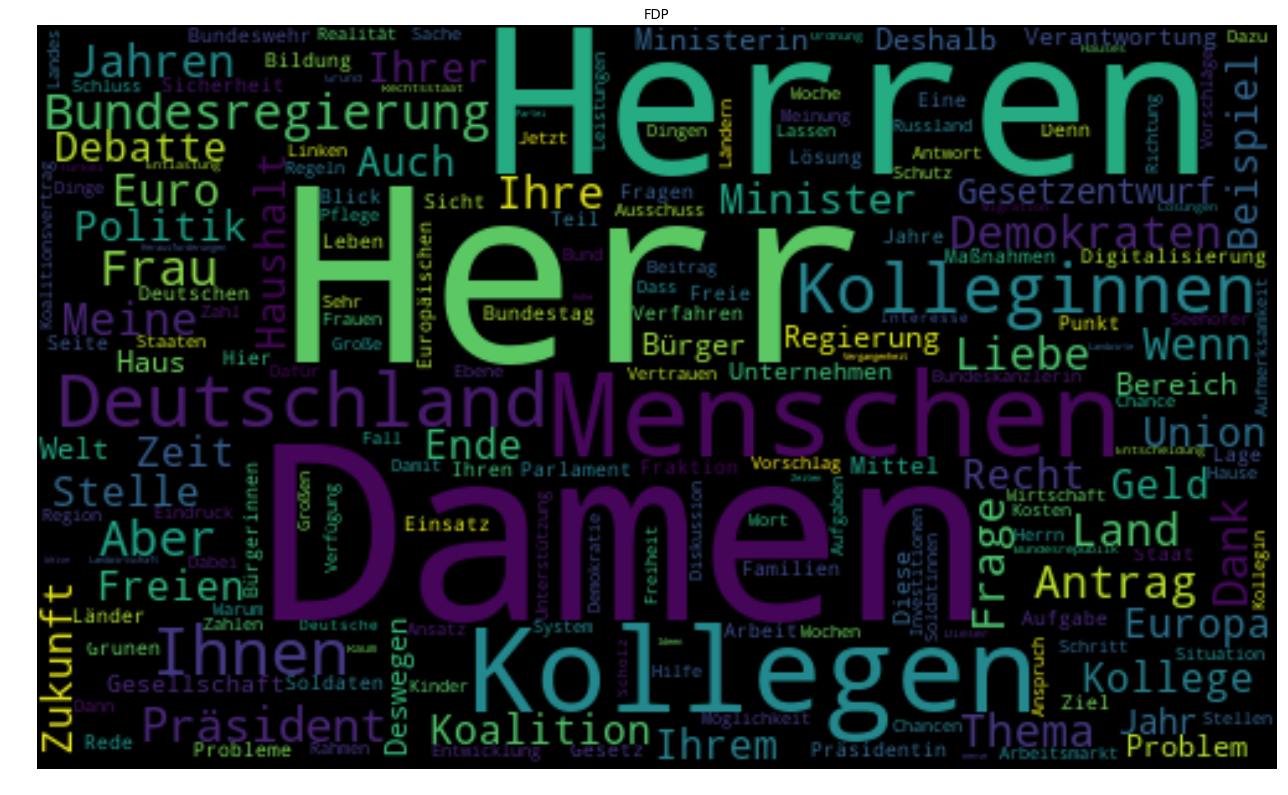

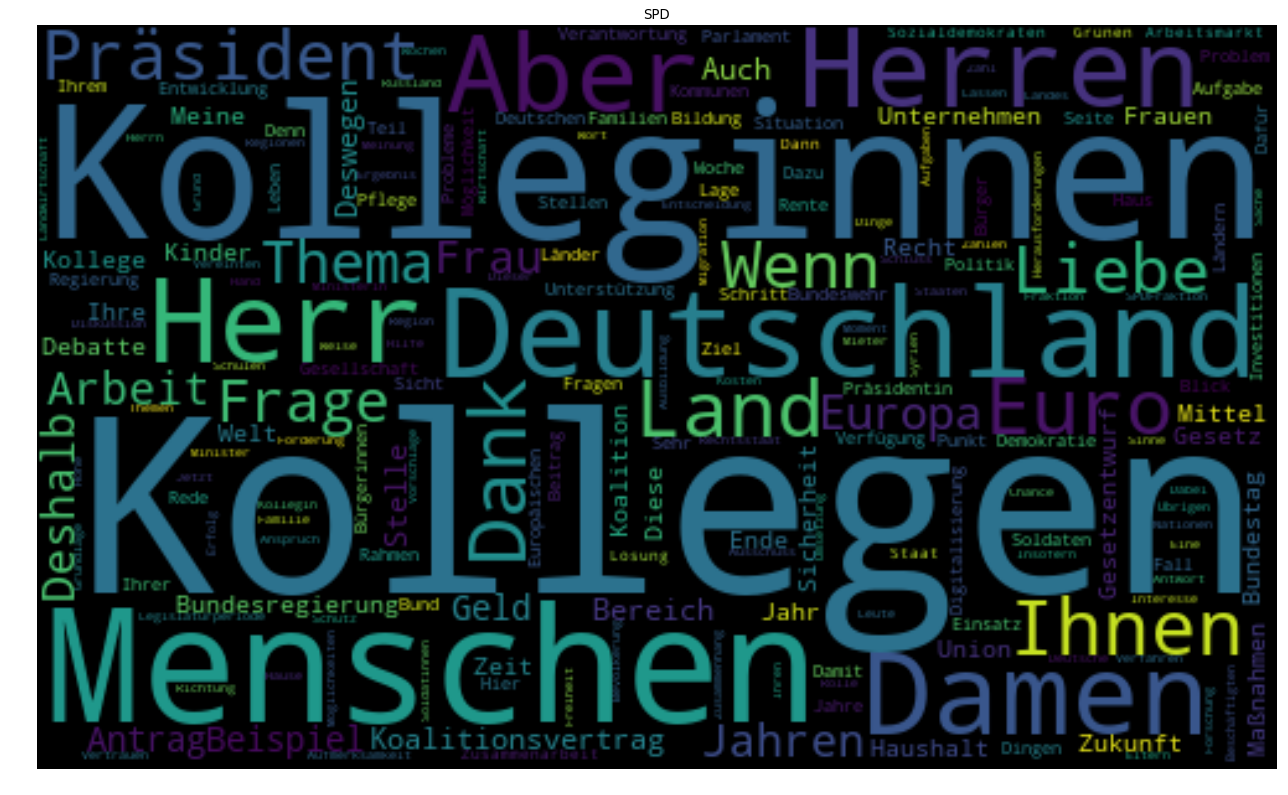

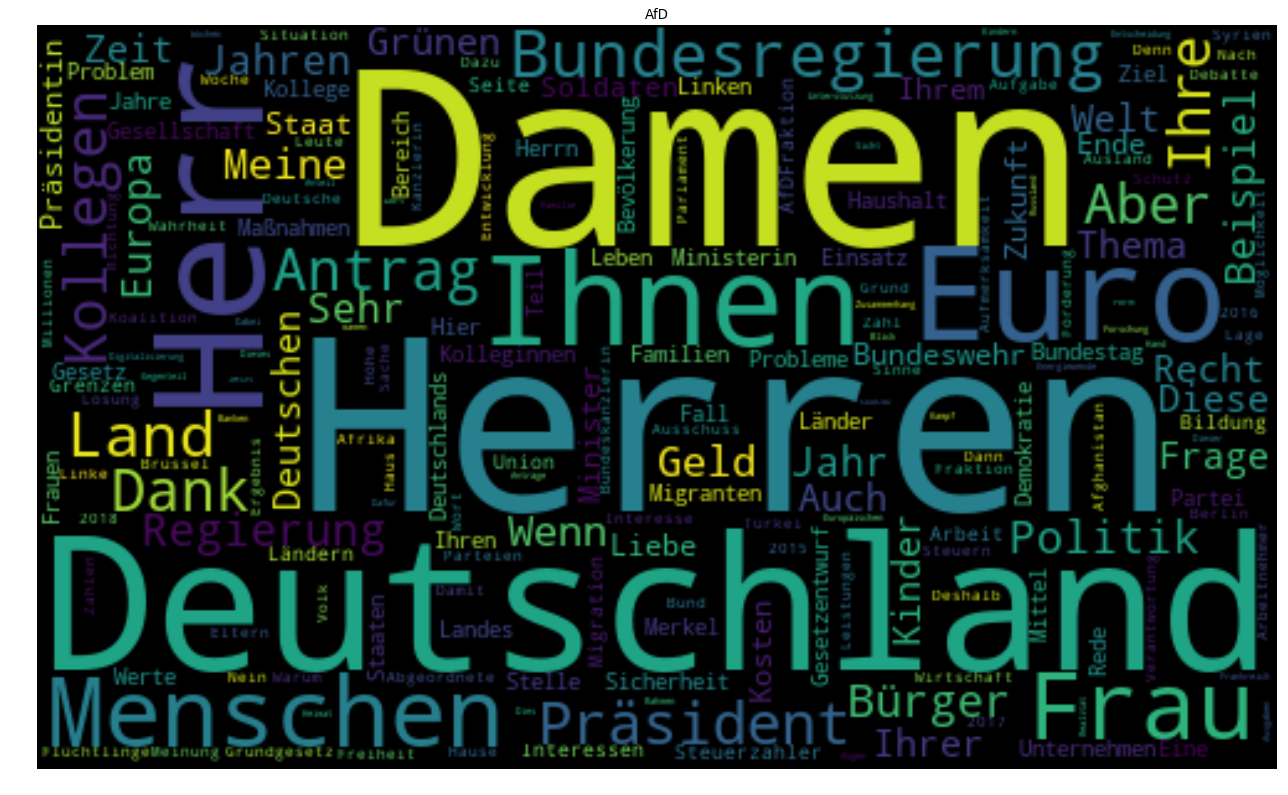

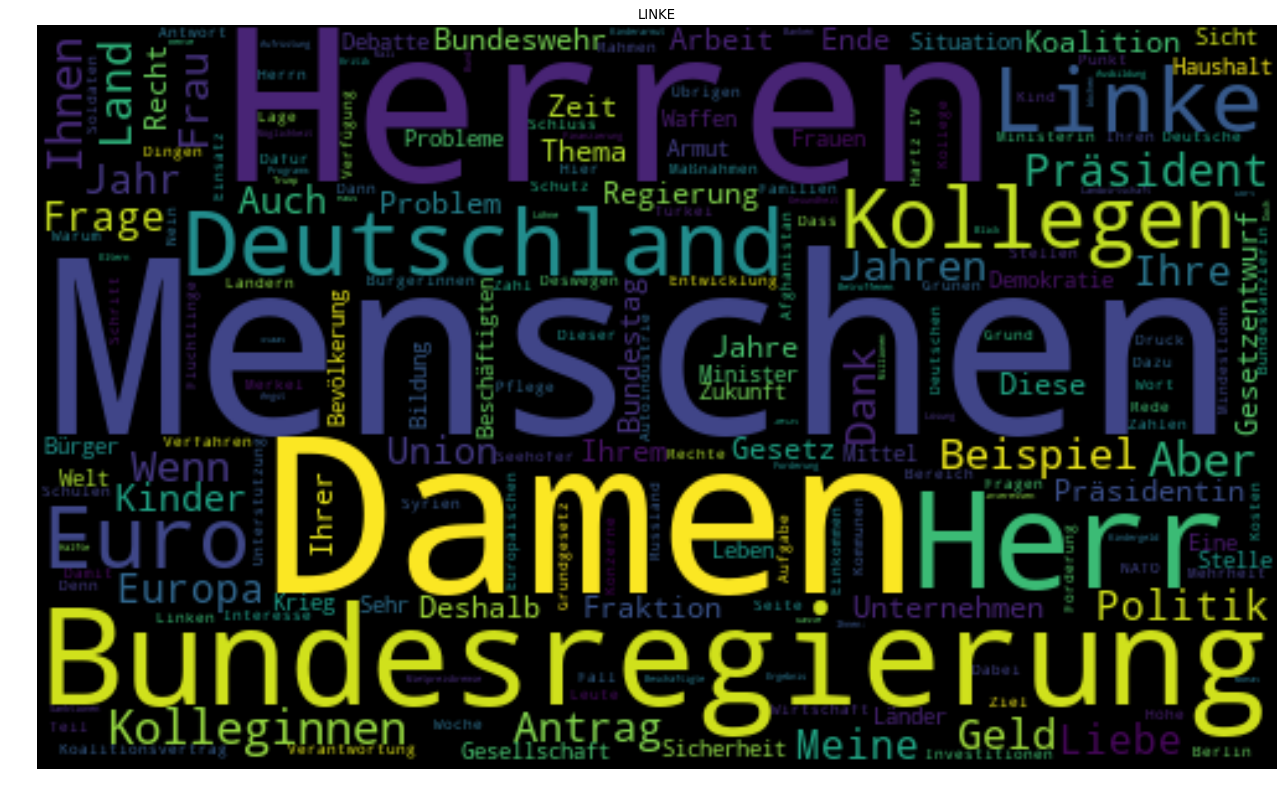

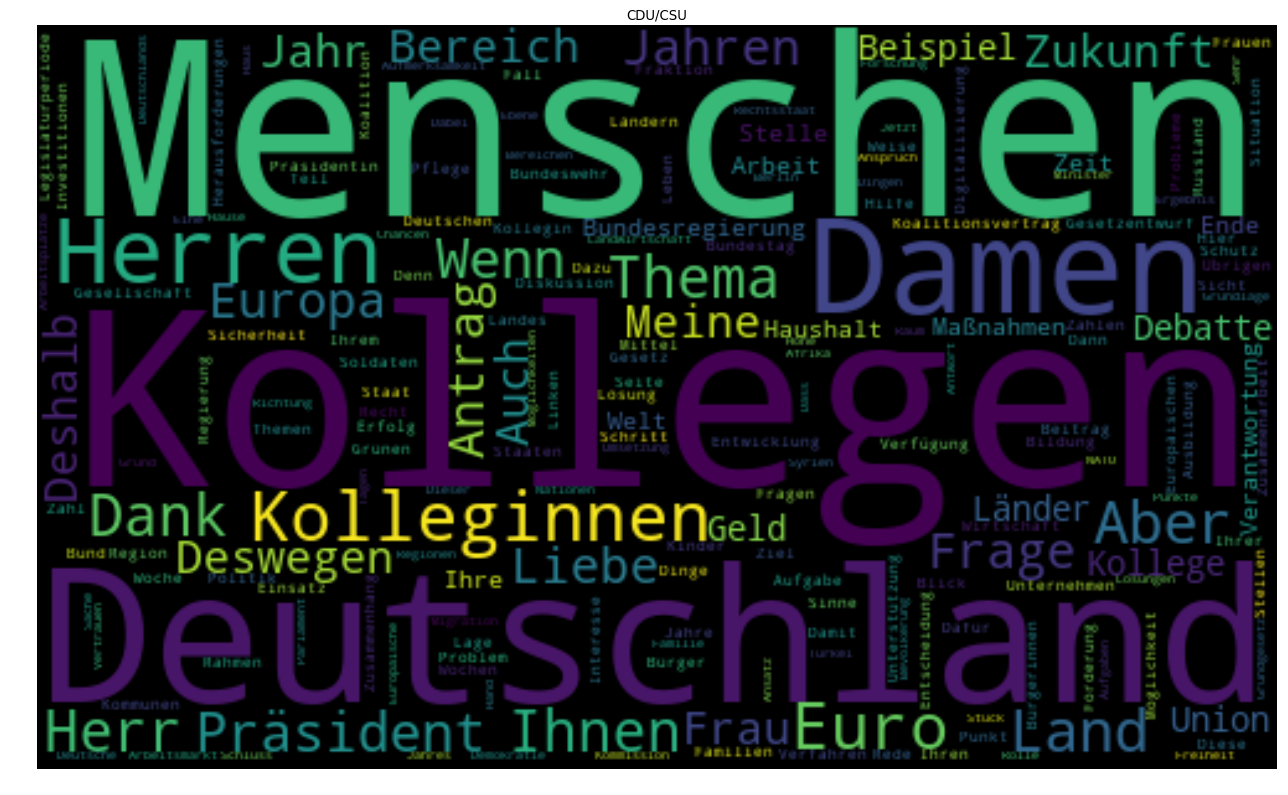

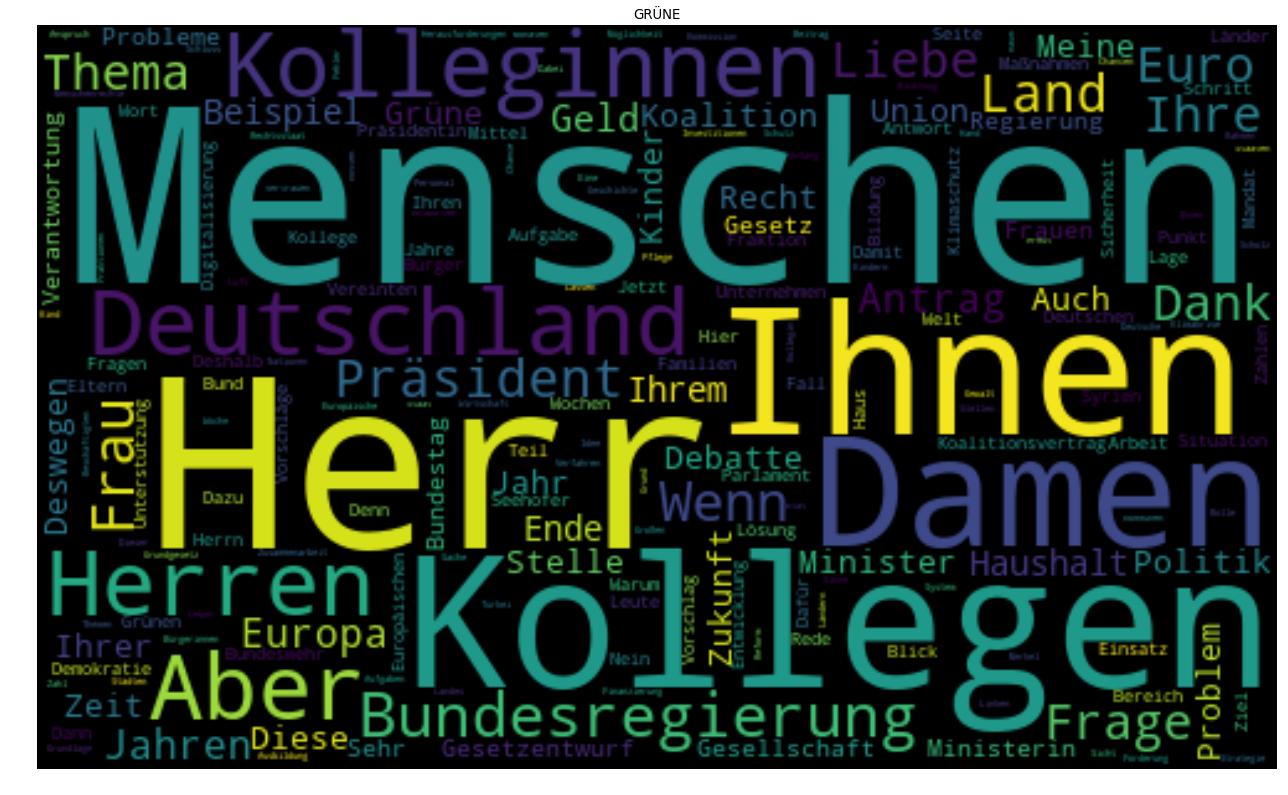

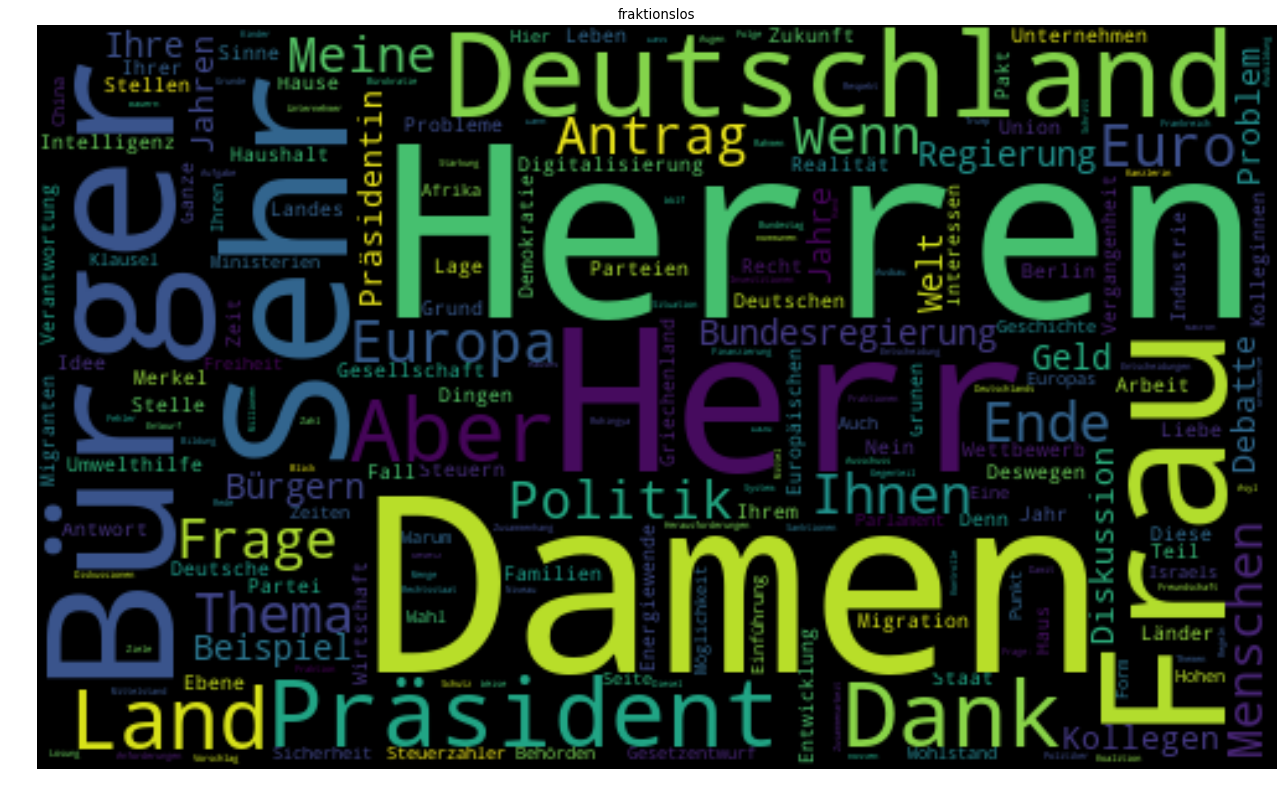

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for k, v in bag_o_words.items():
    wordcloud = WordCloud(max_font_size=100, max_words=200, width=500, height=300).generate_from_frequencies(v)
    plt.figure(figsize=(20,30), dpi= 80)
    plt.title(k)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.savefig(f'{k.replace("/", "")}.jpg')

In [12]:
sorted(bag_o_words['GRÜNE'].items(), key=lambda kv: kv[1], reverse=True)

[('Menschen', 1681),
 ('Herr', 1474),
 ('Kollegen', 1281),
 ('Damen', 1179),
 ('Ihnen', 1168),
 ('Herren', 1154),
 ('Kolleginnen', 1146),
 ('Deutschland', 1117),
 ('Aber', 1082),
 ('Bundesregierung', 1051),
 ('Frau', 862),
 ('Wenn', 767),
 ('Präsident', 757),
 ('Land', 712),
 ('Antrag', 699),
 ('Frage', 676),
 ('Thema', 669),
 ('Dank', 668),
 ('Ihre', 630),
 ('Liebe', 623),
 ('Europa', 590),
 ('Euro', 590),
 ('Jahren', 578),
 ('Beispiel', 506),
 ('Geld', 485),
 ('Union', 473),
 ('Ende', 471),
 ('Ihrem', 457),
 ('Zeit', 445),
 ('Jahr', 442),
 ('Auch', 426),
 ('Debatte', 423),
 ('Meine', 416),
 ('Gesetzentwurf', 410),
 ('Zukunft', 390),
 ('Deswegen', 383),
 ('Politik', 381),
 ('Koalition', 368),
 ('Stelle', 368),
 ('Kinder', 367),
 ('Ihrer', 365),
 ('Diese', 361),
 ('Problem', 356),
 ('Gesetz', 352),
 ('Recht', 350),
 ('Frauen', 349),
 ('Haushalt', 344),
 ('Regierung', 342),
 ('Grüne', 333),
 ('Klimaschutz', 322),
 ('Minister', 316),
 ('Präsidentin', 307),
 ('Bundestag', 300),
 ('Verantw

In [14]:
import pandas as pd
df = pd.DataFrame({})
for frak in bag_o_words.keys():
    bow = sorted(bag_o_words[frak].items(), key=lambda kv: kv[1], reverse=True)
    words = ['AfD', 'Liebe', 'Euro', 'Geld', 'Frieden', 'Freiheit', 'Gerechtigkeit', 'Sicherheit', 'SPD', 'CDU', 'Grünen', 'Nazi', 'Wir', 'Krise', 'Krieg', 'Klima', 'Miete', 'Steuern', 'Waffen']
    stats = {}
    stats['Fraktion'] = frak
    for word in words:
        stats[word] = -1
    for i, (k,v) in enumerate(bow):
        for word in words:
            if word == k:
                stats[word] = i
    df = df.append(stats, ignore_index=True)
    print(f'{(" ").join([str(k) + ":" + str(v) for k,v in stats.items()])} {frak}')
#sorted(bag_o_words['AfD'].items(), key=lambda kv: kv[1], reverse=True)

Fraktion:FDP AfD:70 Liebe:22 Euro:29 Geld:37 Frieden:249 Freiheit:146 Gerechtigkeit:1318 Sicherheit:86 SPD:56 CDU:264 Grünen:68 Nazi:11711 Wir:2 Krise:667 Krieg:499 Klima:531 Miete:1959 Steuern:405 Waffen:1611 FDP
Fraktion:SPD AfD:47 Liebe:18 Euro:20 Geld:36 Frieden:208 Freiheit:201 Gerechtigkeit:470 Sicherheit:62 SPD:40 CDU:489 Grünen:113 Nazi:12305 Wir:2 Krise:543 Krieg:548 Klima:680 Miete:617 Steuern:306 Waffen:742 SPD
Fraktion:AfD AfD:14 Liebe:54 Euro:12 Geld:30 Frieden:283 Freiheit:113 Gerechtigkeit:483 Sicherheit:94 SPD:37 CDU:132 Grünen:35 Nazi:4334 Wir:6 Krise:665 Krieg:448 Klima:411 Miete:1691 Steuern:184 Waffen:520 AfD
Fraktion:LINKE AfD:25 Liebe:31 Euro:14 Geld:29 Frieden:305 Freiheit:364 Gerechtigkeit:470 Sicherheit:101 SPD:42 CDU:254 Grünen:121 Nazi:-1 Wir:3 Krise:353 Krieg:106 Klima:477 Miete:607 Steuern:195 Waffen:127 LINKE
Fraktion:CDU/CSU AfD:59 Liebe:25 Euro:16 Geld:46 Frieden:240 Freiheit:160 Gerechtigkeit:862 Sicherheit:58 SPD:174 CDU:377 Grünen:92 Nazi:-1 Wir:1 Kri

In [15]:
df

AfD    CDU  Euro      Fraktion  Freiheit  Frieden  Geld  Gerechtigkeit  \
0   70.0  264.0  29.0           FDP     146.0    249.0  37.0         1318.0   
1   47.0  489.0  20.0           SPD     201.0    208.0  36.0          470.0   
2   14.0  132.0  12.0           AfD     113.0    283.0  30.0          483.0   
3   25.0  254.0  14.0         LINKE     364.0    305.0  29.0          470.0   
4   59.0  377.0  16.0       CDU/CSU     160.0    240.0  46.0          862.0   
5   40.0  246.0  29.0         GRÜNE     297.0    243.0  34.0          505.0   
6  332.0  138.0  21.0  fraktionslos      77.0    199.0  34.0           -1.0   

   Grünen  Klima  Krieg  Krise  Liebe   Miete     Nazi    SPD  Sicherheit  \
0    68.0  531.0  499.0  667.0   22.0  1959.0  11711.0   56.0        86.0   
1   113.0  680.0  548.0  543.0   18.0   617.0  12305.0   40.0        62.0   
2    35.0  411.0  448.0  665.0   54.0  1691.0   4334.0   37.0        94.0   
3   121.0  477.0  106.0  353.0   31.0   607.0     -1.0   42.0       101.0   
4    92.0  561.0  547.0  865.0   25.0  1819.0     -1.0  174.0        58.0   
5    83.0  331.0  345.0  432.0   26.0  1792.0  23670.0   62.0       118.0   
6    52.0  959.0  808.0  739.0  139.0  2340.0     -1.0   76.0        83.0   

   Steuern  Waffen  Wir  
0    405.0  1611.0  2.0  
1    306.0   742.0  2.0  
2    184.0   520.0  6.0  
3    195.0   127.0  3.0  
4    524.0   788.0  1.0  
5    378.0   467.0  2.0  
6     81.0    -1.0  5.0